Text(0, 0.5, '$logistic(z)$')

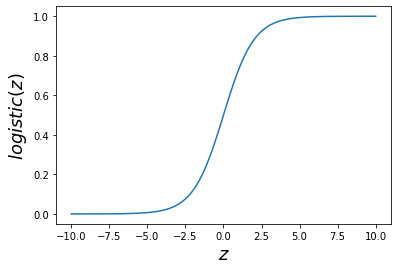

In [3]:
# 逻辑函数也称作S型函数（sigmoid function），可以运行以下几行代码来看一下
import matplotlib.pyplot as plt 
import numpy as np

z = np.linspace(-10,10,100) # 生成(-10,10)范围内指定个数100的一维数组
logistic = 1/(1 + np.exp(-z))

plt.plot(z,logistic)
plt.xlabel('$z$', fontsize=18)
plt.ylabel('$logistic(z)$', fontsize=18)

In [20]:
import seaborn as sns
TRAIN_URL="http://download.tensorflow.org/data/iris_training.csv"

iris=pd.read_csv(TRAIN_URL,header=0,names=column_names)
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


<AxesSubplot:xlabel='Species', ylabel='SepalLength'>

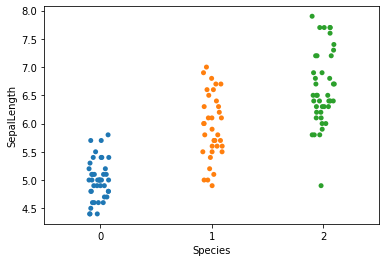

In [21]:
# 可以用seaborn中的stripplot函数将每个种类的花萼长度画出来
# 通过将𝑗𝑖𝑡𝑡𝑒𝑟参数设为𝑇𝑟𝑢𝑒,能够避免所有点都重叠在一条直线上
sns.stripplot(x="Species",y="SepalLength",data=iris,jitter=True)

In [ ]:
#用𝑝𝑎𝑖𝑟𝑝𝑙𝑜𝑡画出散点图矩阵
# kind：用于控制非对角线上的图的类型，可选"scatter"与"reg",默认散点图scatter
# diag_kind：控制对角线上的图的类型，可选"hist"与"kde",hist为直方图
# 通过 palette 参数来调出自己想要的颜色
# markers：控制散点的样式
"""
可以看到对角线上是各个属性的直方图（分布图），而非对角线上是两个不同属性之间的相关图，
从图中我们发现，花瓣的长度和宽度之间以及萼片的长短和花瓣的长、宽之间具有比较明显的相关关系。
"""
sns.pairplot(iris, hue="Species", kind="scatter",diag_kind="kde",palette="husl")


In [ ]:
import pymc3 as pm
import pandas as pd
import scipy.stats as stats
import theano.tensor as tt

In [44]:
# 给训练数据做标签
# 用花萼长度这一特征（自变量）来区分 setosa 和 versicolor 这两个种类。
df = iris.query("Species == ('0','1')")
y_0 = pd.Categorical(df['Species']).codes
x_n = 'SepalLength'
x_0 = df[x_n].values

[5.  4.9 5.7 4.4 5.4 6.7 5.1 5.2 6.9 5.8 5.4 6.3 5.7 5.4 5.2 5.8 5.4 6.7
 6.3 5.1 6.4 5.1 4.8 5.1 4.7 4.8 4.6 5.  6.6 6.1 5.  7.  5.  5.6 6.2 4.4
 5.  4.7 6.6 5.5 4.9 5.5 5.7 6.  5.4 6.1 6.5 5.6 4.9 6.8 5.7 6.  5.  6.1
 5.1 4.6 4.6 4.6 5.9 5.1 4.9 4.9 4.5 5.8 5.  5.2 5.3 5.  5.6 4.8 5.7 5.
 5.  5.5 5.7 4.4 4.8 5.5]
